<a href="https://colab.research.google.com/github/Euan-J-Austin/Analytics_and_Intelligence/blob/main/RandomForestChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Prepare data set
2. Create RF regressor (y is continuous)
3. Measure accuracy
4. Tune model
5. Generate insights

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor

In [65]:
df = pd.read_csv('/content/fullcustomerinfo.csv')

In [66]:
df.head(3)

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,days
0,0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,663.0
1,1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,113.0
2,2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,312.0


In [67]:
df[df.isna().any(axis=1)]

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,days


# Imputing missing data

Used Miss Forest, see notebook titled 'Imputing income with Miss Forest'.


This was not necessary for this model, because RF would model well with the 20 or so missing income datas but I wanted to see how Miss Forest worked to impute data

In [68]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [69]:
#DR dropped Dt_Customer because could correlate with income because income increases with age, account for by Year_Birth ...
#Only a range of 700 days, is it that important for this dataset? Depends why this range of dates was selected?

In [70]:
#DR also dropped recency, is measuring Income

#Isolating X and y

In [71]:
y = df.Response

In [72]:
X = df.drop(columns = 'Response')

# Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y)

#stratify because few responded, many did not

#Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [75]:
model = RandomForestClassifier(n_estimators = 300,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

In [76]:
predictions = model.predict(X_test)
predictions[:5]

array([0., 0., 0., 0., 0.])

In [77]:
#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))
print(y_test.mean())
print(y_test.std())

0.12276785714285714
0.14955357142857142
0.3570319818305584


#Assessment

In [78]:
from sklearn.metrics import classification_report, f1_score

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       381
         1.0       0.75      0.27      0.40        67

    accuracy                           0.88       448
   macro avg       0.82      0.63      0.66       448
weighted avg       0.86      0.88      0.85       448



Precision = number of correctly predicted/number of time predicted
Recall = number of correctly predicted/total members
F1 score will only by high if precision AND recall are high

In [80]:
f1_score(y_test, predictions)

0.39560439560439564

Okay, I don't think that this is very accurate ... maybe instead of response to last, create new column where 1 is response to any campaign ...

#Feature Importance

In [81]:
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)

importance.sort_values(ascending=False)

Recency                    0.089120
days                       0.083193
MntMeatProducts            0.072277
Income                     0.068755
MntWines                   0.065047
MntGoldProds               0.050189
AcceptedCmp5               0.044238
Year_Birth                 0.044184
MntSweetProducts           0.042332
NumWebVisitsMonth          0.040481
MntFishProducts            0.040224
MntFruits                  0.039258
NumStorePurchases          0.038555
NumCatalogPurchases        0.037738
AcceptedCmp3               0.035891
AcceptedCmp1               0.034959
NumWebPurchases            0.033336
NumDealsPurchases          0.029171
Marital_Status_Single      0.013104
Education_PhD              0.012863
Teenhome                   0.010914
Marital_Status_Married     0.010629
Marital_Status_Divorced    0.009255
Marital_Status_Together    0.009045
Education_Graduation       0.008945
AcceptedCmp4               0.008787
Kidhome                    0.007683
AcceptedCmp2               0

<Axes: >

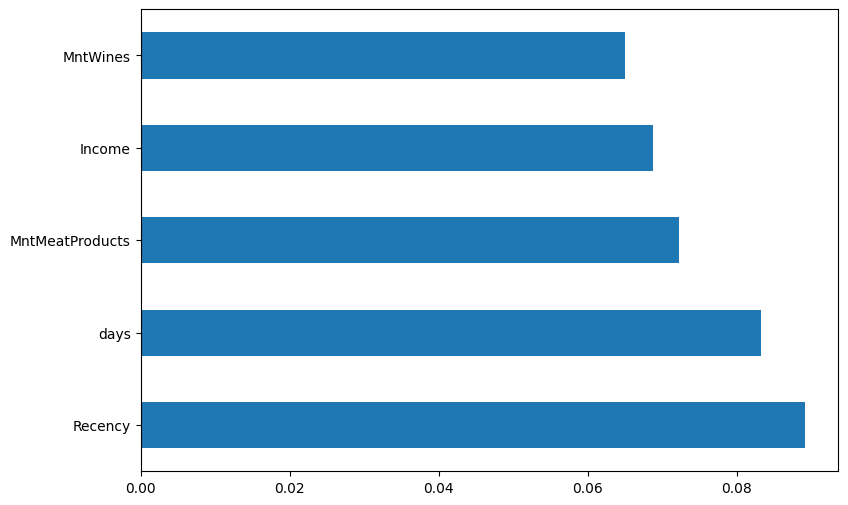

In [82]:
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (9,6))

As would be expected with a dependent variable of response to latest campaign, recency is the most important feature ... days customer might suggest relation between loyalty and response to campaign ... meat and wine could mean they were promoted in the campaign or most responsive customers are more likely to purchase them

#Parameter Tuning

In [83]:
from sklearn.model_selection import ParameterGrid

In [84]:
#Parameter Grid -- we're tuning n_estimators, number of trees

from sklearn.model_selection import ParameterGrid

In [85]:
param_grid = {'n_estimators': range(50,500,50)}
param_grid

{'n_estimators': range(50, 500, 50)}

In [86]:
grid = ParameterGrid(param_grid)
grid

In [87]:
grid[7]

{'n_estimators': 400}

In [88]:
#Storing results
f1score = []
#loop
for p in grid:
  model = RandomForestClassifier(n_estimators = p['n_estimators'],
                                 random_state = 1502)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  f1 = f1_score(y_test, predictions)
  f1score.append(f1)

In [89]:
best_params = grid[np.argmax(f1)]

In [90]:
print(best_params)

{'n_estimators': 50}


In [91]:
#now continue with adjusted range

In [92]:
param_grid2 = {'n_estimators': range(5,50,5)}
param_grid2

{'n_estimators': range(5, 50, 5)}

In [93]:
grid2 = ParameterGrid(param_grid2)

In [94]:
#Storing results
f1score2 = []
#loop
for p in grid2:
  model = RandomForestClassifier(n_estimators = p['n_estimators'],
                                 random_state = 1502)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  f1 = f1_score(y_test, predictions)
  f1score2.append(f1)

In [95]:
best_params = grid2[np.argmax(f1)]

In [96]:
print(best_params)

{'n_estimators': 5}
